# NamasTea Project: Data Preprocessing and Analysis 

First, I import all the libraries I will need in the assignment


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

## 1. Creation of the Toronto Dataframe 

In [2]:
# import the library we use to open URLs
import requests

# import the BeautifulSoup library 
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup
!pip install lxml


# specify and open the url using urllib.request and put the HTML into the page variable
req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

# parse the HTML from our URL 
soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

neighborhood=pd.DataFrame(df[0])

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py36h9f0ad1d_0         163 KB  conda-forge

The following packages will be UPDATED:

    beautifulsoup4: 4.7.1-py36_1 --> 4.9.1-py36h9f0ad1d_0 conda-forge


beautifulsoup4-4.9.1 | 163 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [49]:
neighborhood.head()


,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [50]:
neighborhood.tail()


,Postal Code,Borough,Neighborhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing Centre
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


**Only process the cells that have an assigned borough**


In [51]:
neighborhood=neighborhood[neighborhood.Borough != 'Not assigned']

neighborhood.tail()

,Postal Code,Borough,Neighborhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing Centre
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


**Combine more than one neighborhood when they exist in the same  postal code area using COMMA**


In [52]:
neighborhood['Neighborhood'].replace(r' \/ ', ', ', regex=True, inplace=True)

neighborhood.tail()

,Postal Code,Borough,Neighborhood
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing Centre
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


**Assign borough to neighborhood when neighborhood is Not assigned neighborhood**


In [53]:
neighborhood['Neighborhood']=neighborhood['Neighborhood'].replace('Not assigned', neighborhood['Borough'])
neighborhood.shape


(103, 3)

## 2. Get the latitude and the longitude coordinates of each neighborhood


**Create a dataframe of the coordinates**

In [54]:
!wget -q -O 'toronto_geospatial_data.csv' https://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [55]:
torontogeo= pd.read_csv('toronto_geospatial_data.csv')
torontogeo


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


**Create a unique dataframe** 

In [56]:
toronto_df = neighborhood.merge(torontogeo)
toronto_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## 3. Explore the Borough and the Neighborhoods


**Create map of Toronto using latitude and longitude values**


In [57]:
#geographical coordinates for Toronto

address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [58]:
#Explore Borough

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [59]:
#Explore Neighborhoods

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

**Define my Foursquare details**

In [60]:

CLIENT_ID = 'IB43C4M5C1VPP0XRNG2SSB2R1VQUWVYWODFN1114FWQVLR5Q' 
CLIENT_SECRET = 'N3NWM2XUOXRZDJOPYAY13XA5REUKXSRDEX1TCF23GD5VQJ0O' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: IB43C4M5C1VPP0XRNG2SSB2R1VQUWVYWODFN1114FWQVLR5Q
CLIENT_SECRET:N3NWM2XUOXRZDJOPYAY13XA5REUKXSRDEX1TCF23GD5VQJ0O


**Define a faunction to explore the neighborhoods venues**


In [61]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Create a dataframe with all neighborhoods' venues**

In [62]:

Toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],latitudes=toronto_df['Latitude'], longitudes=toronto_df['Longitude'])

print(Toronto_venues.shape)
Toronto_venues.head()

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [64]:
# check the venues returned for each neighborhood 

Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,54,54,54,54,54,54
"Birch Cliff, Cliffside West",5,5,5,5,5,5
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
Business reply mail Processing Centre,17,17,17,17,17,17


## 4. Identify higher education facilities 

**Search for "College" as mean of the presence of universities, colleges or other higher education facilities**

In [65]:
search_query = ('college')
radius = 500
print(search_query + ' .... OK!')

college .... OK!


**Define the corresponding URL**

In [66]:
latitudes=toronto_df['Latitude']
longitudes=toronto_df['Longitude']

In [67]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IB43C4M5C1VPP0XRNG2SSB2R1VQUWVYWODFN1114FWQVLR5Q&client_secret=N3NWM2XUOXRZDJOPYAY13XA5REUKXSRDEX1TCF23GD5VQJ0O&ll=43.6534817,-79.3839347&v=20180605&query=college&radius=500&limit=100'

**Send the GET Request and examine the results**

In [68]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec7d6f677af03001b5a0428'},
 'response': {'venues': [{'id': '4ad4c064f964a52065f820e3',
    'name': 'Ontario College of Art and Design University (OCADU)',
    'location': {'address': '100 McCaul St',
     'crossStreet': 'at Dundas St W',
     'lat': 43.65280251171013,
     'lng': -79.3910743699992,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65280251171013,
       'lng': -79.3910743699992}],
     'distance': 579,
     'postalCode': 'M5T 1W1',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['100 McCaul St (at Dundas St W)',
      'Toronto ON M5T 1W1',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1ae941735',
      'name': 'University',
      'pluralName': 'Universities',
      'shortName': 'University',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId'

**Get relevant part of JSON and transform it into a dataframe**

In [69]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",False,4ad4c064f964a52065f820e3,100 McCaul St,CA,Toronto,Canada,at Dundas St W,579,"[100 McCaul St (at Dundas St W), Toronto ON M5...","[{'label': 'display', 'lat': 43.65280251171013...",43.652803,-79.391074,M5T 1W1,ON,Ontario College of Art and Design University (...,v-1590154942,NaN
1,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4ff2e8b3e4b0a148f8d63b1b,180 Dundas Street West,CA,Toronto,Canada,NaN,317,"[180 Dundas Street West, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655643, 'lng':...",43.655643,-79.386504,NaN,ON,College Of Respiratory Therapists Of Ontario,v-1590154942,NaN
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4ed5111929c2bbe66189dbde,438 University Ave.,CA,Toronto,Canada,University/Dundas,363,"[438 University Ave. (University/Dundas), Toro...","[{'label': 'display', 'lat': 43.65443940990297...",43.654439,-79.388243,NaN,ON,College Of Early Childhood Educators,v-1590154942,NaN
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4faac3d5e4b06c670e1afcc4,424 Yonge,CA,Toronto,Canada,College and Yonge,260,"[424 Yonge (College and Yonge), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.65293604935704...",43.652936,-79.387083,NaN,ON,College Park Residences,v-1590154942,NaN
4,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",False,5187c645498e659525992bef,150 Dundas Street West,CA,Toronto,Canada,NaN,246,"[150 Dundas Street West, Toronto ON M5G 1C6, C...","[{'label': 'display', 'lat': 43.65539371563695...",43.655394,-79.385483,M5G 1C6,ON,SGIC - Saint George International College,v-1590154942,NaN


**Define information of interest and filter dataframe**

In [70]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Ontario College of Art and Design University (...,University,100 McCaul St,CA,Toronto,Canada,at Dundas St W,579,"[100 McCaul St (at Dundas St W), Toronto ON M5...","[{'label': 'display', 'lat': 43.65280251171013...",43.652803,-79.391074,M5T 1W1,ON,4ad4c064f964a52065f820e3
1,College Of Respiratory Therapists Of Ontario,Office,180 Dundas Street West,CA,Toronto,Canada,NaN,317,"[180 Dundas Street West, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.655643, 'lng':...",43.655643,-79.386504,NaN,ON,4ff2e8b3e4b0a148f8d63b1b
2,College Of Early Childhood Educators,Office,438 University Ave.,CA,Toronto,Canada,University/Dundas,363,"[438 University Ave. (University/Dundas), Toro...","[{'label': 'display', 'lat': 43.65443940990297...",43.654439,-79.388243,NaN,ON,4ed5111929c2bbe66189dbde
3,College Park Residences,Residential Building (Apartment / Condo),424 Yonge,CA,Toronto,Canada,College and Yonge,260,"[424 Yonge (College and Yonge), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.65293604935704...",43.652936,-79.387083,NaN,ON,4faac3d5e4b06c670e1afcc4
4,SGIC - Saint George International College,Student Center,150 Dundas Street West,CA,Toronto,Canada,NaN,246,"[150 Dundas Street West, Toronto ON M5G 1C6, C...","[{'label': 'display', 'lat': 43.65539371563695...",43.655394,-79.385483,M5G 1C6,ON,5187c645498e659525992bef
5,College Optical,Eye Doctor,555 university ave,CA,Toronto,Canada,NaN,551,"[555 university ave, Toronto ON m5v 1x8, Canada]","[{'label': 'display', 'lat': 43.65739368160872...",43.657394,-79.388130,m5v 1x8,ON,4d9247bc639d14565f1b406c
6,Greystone College,College Technology Building,NaN,CA,NaN,Canada,NaN,341,[Canada],"[{'label': 'display', 'lat': 43.65479693006243...",43.654797,-79.387760,NaN,NaN,555c8e9e498ebde0730b3ca7
7,College of Physiotherapists of Ontario,Office,375 University Ave,CA,NaN,Canada,NaN,581,"[375 University Ave, Canada]","[{'label': 'display', 'lat': 43.6482638143444,...",43.648264,-79.384152,NaN,NaN,4fbe6809e4b09e81e6a8d571
8,Herzing College,General College & University,220 Yonge St,CA,Toronto,Canada,NaN,247,"[220 Yonge St, Toronto ON m5b 2h1, Canada]","[{'label': 'display', 'lat': 43.65455268367057...",43.654553,-79.381242,m5b 2h1,ON,4cc5c3c3f49676b02a8273d5
9,The Royal College of Dentists of Canada,Office,"180 Dundas Street West, Suite 2003",CA,Toronto,Canada,NaN,330,"[180 Dundas Street West, Suite 2003, Toronto O...","[{'label': 'display', 'lat': 43.655805, 'lng':...",43.655805,-79.386498,M5G 1Z8,ON,4d6d0fc0cb7a8cfaf4665979


**Let's visualize the higher education vacilities in Toronto**

In [71]:
dataframe_filtered.name

0     Ontario College of Art and Design University (...
1          College Of Respiratory Therapists Of Ontario
2                  College Of Early Childhood Educators
3                               College Park Residences
4             SGIC - Saint George International College
5                                       College Optical
6                                     Greystone College
7                College of Physiotherapists of Ontario
8                                       Herzing College
9               The Royal College of Dentists of Canada
10                    Community College of Philadelphia
11                            Ontario College Of Trades
12                              21 college, CCIM office
13                                    Evergreen College
14                                         Fit for Life
15                                  Yonge-Dundas Square
Name: name, dtype: object

In [72]:
education_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add the higher educationion facilities as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(education_map)

# display map
education_map

## 5. Explore and cluster the Neighborhoods in Downtown Toronto	Borough, where there are the majority of educational facilites 


In [73]:
higher_education = toronto_df[toronto_df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
higher_education

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [74]:
#geographical coordinates for bla bla

address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


In [75]:
# create map of bla bla using latitude and longitude values
map_Downtown_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(higher_education['Latitude'], higher_education['Longitude'], higher_education['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Downtown_Toronto)  
    
higher_education

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [76]:
#create a dataframe with all bla bla venues by calling the function getNearbyVenues

Downtown_Toronto_venues = getNearbyVenues(names=higher_education['Neighborhood'],latitudes=higher_education['Latitude'], longitudes=higher_education['Longitude'])

print(Downtown_Toronto_venues.shape)
Downtown_Toronto_venues.head()

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley
(1213, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [77]:
# check the venues returned for each neighborhood 

Downtown_Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,54,54,54,54,54,54
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,65,65,65,65,65,65
Christie,17,17,17,17,17,17
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


**Analyze each neighborhood**

In [78]:
# one hot encoding
Downtown_Toronto_onehot = pd.get_dummies(Downtown_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Downtown_Toronto_onehot['Neighborhood'] = Downtown_Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Downtown_Toronto_onehot.columns[-1]] + list(Downtown_Toronto_onehot.columns[:-1])
blabla_onehot = Downtown_Toronto_onehot[fixed_columns]

Downtown_Toronto_onehot.head()
Downtown_Toronto_onehot.shape

(1213, 210)

In [79]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

Downtown_Toronto_grouped = Downtown_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Downtown_Toronto_grouped
Downtown_Toronto_grouped.shape


(19, 210)

**5 most common venues for each neighborhood**

In [80]:
num_top_venues = 5

for hood in Downtown_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Downtown_Toronto_grouped[Downtown_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.06
2            Beer Bar  0.04
3                Café  0.04
4  Seafood Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.20
1     Airport Terminal  0.13
2        Boat or Ferry  0.07
3      Harbor / Marina  0.07
4  Rental Car Location  0.07


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1       Sandwich Place  0.06
2   Italian Restaurant  0.06
3                 Café  0.05
4  Japanese Restaurant  0.03


----Christie----
           venue  freq
0  Grocery Store  0.24
1           Café  0.18
2           Park  0.12
3          Diner  0.06
4     Restaurant  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1  Japanese Restaurant  0.06
2     Sushi Restaurant  0.06
3           Re

In [81]:
#function to sort vanues in descending order 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
#new dataframe that displays the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Downtown_Toronto_grouped['Neighborhood']

for ind in np.arange(Downtown_Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Downtown_Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Beer Bar,Restaurant,Seafood Restaurant,Cheese Shop,Bakery,Comfort Food Restaurant,Basketball Stadium
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Boutique,Rental Car Location,Sculpture Garden,Plane,Harbor / Marina,Boat or Ferry,Airport Lounge,Airport Gate
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Bar,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Ice Cream Shop
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Nightclub,Candy Store,Restaurant,Baby Store
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Café,Hotel,Gastropub,Yoga Studio,Mediterranean Restaurant


### Cluster Neighborhoods


In [83]:
# set number of clusters
kclusters = 5

Downtown_Toronto_grouped_clustering = Downtown_Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Downtown_Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 4, 0, 0, 0, 0, 0, 0], dtype=int32)

In [84]:
#new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Downtown_Toronto_merged = higher_education

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Downtown_Toronto_merged = Downtown_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Downtown_Toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Hotel,French Restaurant,Health Food Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,College Cafeteria,Yoga Studio,Music Venue,Beer Bar,Sandwich Place,Burger Joint,Burrito Place,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Cosmetics Shop,Café,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Bookstore
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cocktail Bar,Gastropub,American Restaurant,Theater,Restaurant,Gym,Beer Bar,Department Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Café,Beer Bar,Restaurant,Seafood Restaurant,Cheese Shop,Bakery,Comfort Food Restaurant,Basketball Stadium


In [85]:
#map the clusters 

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Downtown_Toronto_merged['Latitude'], Downtown_Toronto_merged['Longitude'], Downtown_Toronto_merged['Neighborhood'], Downtown_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

In [86]:
#Cluster 1 

common_venues1= Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 0, Downtown_Toronto_merged.columns[[1] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
common_venues1


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Hotel,French Restaurant,Health Food Store
1,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,College Cafeteria,Yoga Studio,Music Venue,Beer Bar,Sandwich Place,Burger Joint,Burrito Place,Café
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Cosmetics Shop,Café,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Bookstore
3,Downtown Toronto,0,Café,Coffee Shop,Cocktail Bar,Gastropub,American Restaurant,Theater,Restaurant,Gym,Beer Bar,Department Store
4,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Café,Beer Bar,Restaurant,Seafood Restaurant,Cheese Shop,Bakery,Comfort Food Restaurant,Basketball Stadium
5,Downtown Toronto,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Bar,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Ice Cream Shop
7,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Clothing Store,Hotel,Thai Restaurant,Gym,Deli / Bodega,American Restaurant,Concert Hall
8,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Restaurant,Sporting Goods Shop,Italian Restaurant,Scenic Lookout,Fried Chicken Joint
9,Downtown Toronto,0,Coffee Shop,Hotel,Café,Restaurant,American Restaurant,Salad Place,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Sporting Goods Shop
10,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Deli / Bodega,Seafood Restaurant,Japanese Restaurant,Italian Restaurant


In [87]:
#Cluster 2

common_venues2= Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 1, Downtown_Toronto_merged.columns[[1] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
common_venues2


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,1,Airport Service,Airport Terminal,Boutique,Rental Car Location,Sculpture Garden,Plane,Harbor / Marina,Boat or Ferry,Airport Lounge,Airport Gate


In [88]:
#Cluster 3 

common_venues3= Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 2, Downtown_Toronto_merged.columns[[1] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
common_venues3


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,2,Park,Playground,Trail,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


In [89]:
#Cluster 4

common_venues4= Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 3, Downtown_Toronto_merged.columns[[1] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
common_venues4


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Downtown Toronto,3,Café,Restaurant,Bar,Italian Restaurant,Japanese Restaurant,Bookstore,Bakery,Sandwich Place,Beer Bar,Beer Store


In [90]:
#Cluster 5

common_venues5= Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 4, Downtown_Toronto_merged.columns[[1] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
common_venues5


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,4,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Nightclub,Candy Store,Restaurant,Baby Store


## 6. Important plots and tables for decision 

In [91]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [106]:
firstmc= Downtown_Toronto_merged['1st Most Common Venue'].value_counts()
firstmc

Coffee Shop        11
Café                3
Park                1
Grocery Store       1
Clothing Store      1
Restaurant          1
Airport Service     1
Name: 1st Most Common Venue, dtype: int64

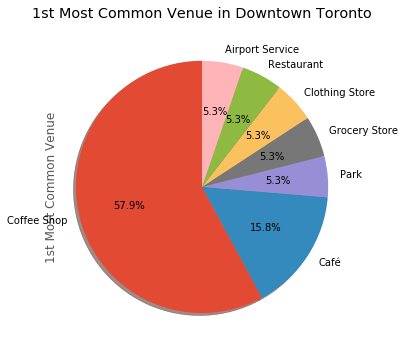

In [155]:
# autopct create %, start angle represent starting point
firstmc.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%',
             startangle=90,
             shadow=True,
            )

plt.title('1st Most Common Venue in Downtown Toronto')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [108]:
secondmc= Downtown_Toronto_merged['2nd Most Common Venue'].value_counts()
secondmc

Café                     5
Coffee Shop              3
Sushi Restaurant         2
Cocktail Bar             1
Italian Restaurant       1
Restaurant               1
Airport Terminal         1
Pub                      1
Aquarium                 1
Playground               1
Hotel                    1
Vietnamese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64

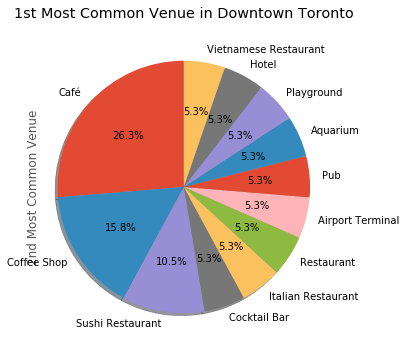

In [109]:
# autopct create %, start angle represent starting point
secondmc.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%',
             startangle=90,
             shadow=True,
            )

plt.title('1st Most Common Venue in Downtown Toronto')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [110]:
thirdmc= Downtown_Toronto_merged['2nd Most Common Venue'].value_counts()
thirdmc

Café                     5
Coffee Shop              3
Sushi Restaurant         2
Cocktail Bar             1
Italian Restaurant       1
Restaurant               1
Airport Terminal         1
Pub                      1
Aquarium                 1
Playground               1
Hotel                    1
Vietnamese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64

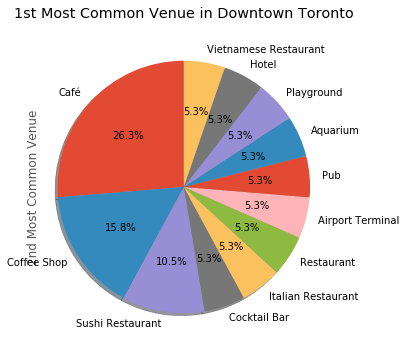

In [99]:
# autopct create %, start angle represent starting point
thirdmc.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%',
             startangle=90,
             shadow=True,
            )

plt.title('1st Most Common Venue in Downtown Toronto')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [140]:
Downtown_Toronto_grouped.describe()

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0

In [153]:
Downtown_Toronto_merged

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",0,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Hotel,French Restaurant,Health Food Store
1,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Sushi Restaurant,College Cafeteria,Yoga Studio,Music Venue,Beer Bar,Sandwich Place,Burger Joint,Burrito Place,Café
2,"Garden District, Ryerson",0,Clothing Store,Coffee Shop,Bubble Tea Shop,Cosmetics Shop,Café,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Bookstore
3,St. James Town,0,Café,Coffee Shop,Cocktail Bar,Gastropub,American Restaurant,Theater,Restaurant,Gym,Beer Bar,Department Store
4,Berczy Park,0,Coffee Shop,Cocktail Bar,Café,Beer Bar,Restaurant,Seafood Restaurant,Cheese Shop,Bakery,Comfort Food Restaurant,Basketball Stadium
5,Central Bay Street,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Salad Place,Bar,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Ice Cream Shop
6,Christie,4,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Nightclub,Candy Store,Restaurant,Baby Store
7,"Richmond, Adelaide, King",0,Coffee Shop,Café,Restaurant,Clothing Store,Hotel,Thai Restaurant,Gym,Deli / Bodega,American Restaurant,Concert Hall
8,"Harbourfront East, Union Station, Toronto Islands",0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Restaurant,Sporting Goods Shop,Italian Restaurant,Scenic Lookout,Fried Chicken Joint
9,"Toronto Dominion Centre, Design Exchange",0,Coffee Shop,Hotel,Café,Restaurant,American Restaurant,Salad Place,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Sporting Goods Shop


In [152]:
Downtown_Toronto_merged.describe(include=['object'])

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,19,19,19,19,19,19,19,19,19,19,19
unique,19,7,12,15,17,15,16,17,17,16,19
top,"University of Toronto, Harbord",Coffee Shop,Café,Café,Hotel,American Restaurant,Restaurant,Italian Restaurant,Italian Restaurant,Restaurant,Fried Chicken Joint
freq,1,11,5,3,2,3,2,2,2,2,1


In [166]:
num_top_venues = 5


for hood in Downtown_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Downtown_Toronto_grouped[Downtown_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.06
2            Beer Bar  0.04
3                Café  0.04
4  Seafood Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.20
1     Airport Terminal  0.13
2        Boat or Ferry  0.07
3      Harbor / Marina  0.07
4  Rental Car Location  0.07


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1       Sandwich Place  0.06
2   Italian Restaurant  0.06
3                 Café  0.05
4  Japanese Restaurant  0.03


----Christie----
           venue  freq
0  Grocery Store  0.24
1           Café  0.18
2           Park  0.12
3          Diner  0.06
4     Restaurant  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1  Japanese Restaurant  0.06
2     Sushi Restaurant  0.06
3           Re